# 폐렴 진단기 성능개선

- 대략 80% 정도의 정확도를 가진 X-RAY 사진 판독 폐렴 진단기를 만들어 보았음
- 하지만 숙련된 의사분들은 90% 이상에 도달하는 정확도에 도달
- 어떤 점을 더 개선해볼 수 있을지 따져 보며 성능 향상

## 목차
- 1. 프로젝트 개요
- 2. 프로젝트 소개
- 3. 데이터셋 정보
- 4. 실험환경 Set-up
- 5. 데이터 준비하기
- 6. 데이터 시각화
- 7. CNN 모델링
- 8. 데이터 imbalance 처리
- 9. 모델 훈련
- 10. 결과 확인과 시각화

## 1. 프로젝트 개요

![폐렴.png](./images/폐렴.png)
- 딥러닝 기술이 산업적으로 명확한 용도를 입증한 도메인 중 하나로 의료 분야를 들 수 있음
- 의료 영상을 분석하는 일은 전문적인 훈련을 받은 숙련된 의료 인력만 가능한 일입니다만, 최근의 발달된 딥러닝 기술은 숙련자 수준 이상의 정확도를 바탕으로 영상분석 인력의 개인적 편차, 주관적 판단, 피로에 의한 오진 등의 부정확성을 극복할 수 있는 좋은 대안으로 인정받고 있음
- 하지만, 의료 영상을 분석하는 것은 일반적인 이미지 처리와는 다소 다른 독특한 특징이 있음
    - 의료 영상 이미지는 개인 정보 보호 등의 이슈로 인해 데이터를 구하는 것이 쉽지 않음
    - 라벨링 작업 자체가 전문적 지식을 요하므로 데이터셋 구축 비용이 비쌈
    - 희귀질병을 다루는 경우, 데이터를 입수하는 것 자체가 드문 일
    - 음성/양성 데이터 간 imbalance가 심함. 학습에 주의가 필요
    - 이미지만으로 진단이 쉽지 않아 다른 데이터와 결합해서 해석해야 할 수도 있음
- 따라서 의료 영상 처리를 위해서는 딥러닝 영상처리 기술뿐 아니라, 의료 도메인 지식 및 의료 영상에 대한 명확한 이해가 아울러 필요
- 이번 노드에서는 의료 영상의 기초 상식에 대해 간단히 알아보고, 실제로 의료 영상 데이터를 처리하는 실습을 해보려고 함

## 2. 프로젝트 소개

- 의료 인공지능은 다양한 분야에서 사용됨
- 질병의 정확한 분류 또는 환자의 중증도를 확인하는 용도 등 다양한 용도로 사용됨
- 이 중에서 현재 가장 핫한 분야는 질병을 탐지해내는 인공지능
- 이번 노드에서 의사처럼 질병을 찾아내는 딥러닝 모델을 만들 예정
- 그 중에서도 폐렴(Pneumonia)을 찾아내는 딥러닝 모델 만드는 것

## 3. 데이터셋 정보

- 사용할 데이터셋은 **캐글의 Chest X-RAY Images**
- 데이터의 구성은 ~/aiffel/chest_xray/data 하위에 3개의 폴더(train, test, val)로 구성되며, 각 이미지 카테고리(폐렴/정상)에 대한 하위 폴더를 포함함
- 5,856개의 X-Ray 이미지(JPEG)와 2개의 범주(폐렴/정상)가 있음
- 전체 데이터의 크기는 총 1.2GB 가량 됨
- (에디터 주) 캐글에서 다운로드한 데이터는 chest_xray 하위에 chest_xray 폴더가 중복으로 포함되어 있어서 전체 데이터의 크기가 2.5GB인 경우가 있음. 중복된 데이터는 필요하지 않음
- 해당 이미지는 중국 광저우에 있는 광저우 여성 및 어린이 병원의 1 ~ 5세 소아 환자의 흉부 X선 영상
- [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
- 클라우드에 이미 데이터셋 업로드되어 있음
```python
$ mkdir -p ~/aiffel/chest_xray
$ ln -s ~/data/ ~/aiffel/chest_xray
```

#### 폐렴 구별법
![폐렴구별법.png](./images/폐렴구별법.png)
- 폐렴의 구별법은 언뜻 예상외로 간단
- X-RAY 사진상, 다양한 양상의 음영(폐 부위에 희미한 그림자) 증가가 관찰됨
- 구별 방법은 간단하지만, 실제로 영상을 보면 희미한 경우가 많이 있어 저게 실제로 폐렴으로 인한 것인지 아니면 다른 이유 때문인지 파악하기 어려움
![폐렴사진비교.png](./images/폐렴사진비교.png)
- 정상적인 흉부 X-RAY(왼쪽)는 이미지에서 비정상적인 음영 영역이 없는 깨끗한 폐 보여줌
- 세균성 폐렴(가운데)은 일반적으로 오른쪽 상부 엽(흰색 화살표)에 있는 것으로 나타남
- 바이러스성 폐렴(오른쪽)은 양쪽 폐에서보다 확산된 "interstitial(조직 사이에 있는)" 패턴으로 나타남

## 4. 실험환경 Set-up

- 가장 먼저, 패키지(라이브러리)들을 import

In [1]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

- 앞으로 필요한 변수들을 생성

In [2]:
# 데이터 로드할 때 빠르게 로드할 수 있도록 하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE

# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*'
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# 프로젝트를 진행할 때 아래 두 변수 변경해보기
BATCH_SIZE = 16
EPOCHS = 25

print(ROOT_PATH)

/aiffel/aiffel


## 5. 데이터 준비하기

- import를 했으니 데이터 가져와 보기
- 데이터를 열어보면 이미 train, val(validation), test로 나누어져 있음
- 각 데이터들의 개수 체크해보기

In [3]:
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


- train 안에는 5,216개, test 안에는 624개, val 안에는 16개가 있음
- 개수 비는 89%, 10.7%, 0.3%
- val 개수가 너무 없기 때문에 train에서 val에 쓰일 데이터를 더 가져와보기
- train과 val에 있는 데이터를 모은 다음에 train:val를 80:20으로 분할

In [4]:
# train 데이터와 validation 데이터를 모두 filenames에 담기
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나누기
train_size = math.floor(len(filenames)*0.8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


- 이제 train은 4185개, test는 624개, val은 1047개가 되었음
- test_size를 수정하면 개수는 달라질 수 있음
- train 데이터 안에 정상 이미지 수와 폐렴 이미지 수 확인하기

In [5]:
# 정상 이미지와 폐렴 이미지를 구분해야 함
# 파일 경로에 힌트가 있음
print(f'Normal imaeg path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')

Normal imaeg path
/aiffel/aiffel/chest_xray/data/train/PNEUMONIA/person487_bacteria_2056.jpeg
Pneumonia image path
/aiffel/aiffel/chest_xray/data/train/PNEUMONIA/person838_virus_1476.jpeg


In [6]:
# 파일 경로에 NORMAL이 있는지 확인하면 정상 이미지를 셀 수 있음
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")

# 파일 경로에 PNEUMONIA이 있는지 확인하면 폐렴 이미지도 셀 수 있음
COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1114
Pneumonia images count in training set: 3071


- 결과를 보면 정상보다 폐렴 이미지 수가 3배 더 많이 있음
- 우리가 사용할 CNN 모델의 경우 데이터가 클래스별 balance가 좋을수록 training을 잘함
- 데이터가 클래스 불균형(imbalance)한 것은 차후에 조정할 예정
- test와 val 데이터셋은 평가하기 위해서 사용되기 때문에 학습과 관련이 없으므로 imbalance한 데이터 셋이어도 문제없음

- tf.data 인스턴스 만들어보기
- tf.data는 tensorflow에서 학습시킬 때, 배치처리 작업을 보다 효율적으로 할 수 있도록 해줌

In [7]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

- Train 데이터셋, validation 데이터셋 개수 확인

In [8]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


- 현재 이미지에는 라벨 데이터가 따로 없음
- 파일 경로에 'NORMAL'이나 'PNEUMONIA'가 포함되어 있기 때문에 이를 이용해서 라벨 데이터를 만들어 주는 함수 만들어보기

In [9]:
# 파일 경로의 끝에서 2번째 부분을 확인하면 양성과 음성을 구분할 수 있음
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    # 폐렴이면 양성(True), normal이면 음성(False)
    return parts[-2] == "PNEUMONIA"

- 이미지 데이터는 현실적으로 사이즈가 제각각일 가능성이 높음
- 이미지의 사이즈를 통일시키고, GPU 메모리를 더욱 효율적으로 사용하기 위해 이미지 사이즈 줄여보기
- decode_img 함수와 process_path 함수 만들기
- process_path 함수에서 decode_img 함수를 이용해서 이미지의 데이터 타입을 float으로 바꾸고, 사이즈를 변경
- get_label을 이용해서 라벨 값 가져오기

In [10]:
# 이미지를 알맞은 형식으로 바꾸기
def decode_img(img):
    # 1. 이미지를 unit8 tensor로 수정
    img = tf.image.decode_jpeg(img, channels = 3)
    # 2. float32 타입으로 수정
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 3. 이미지 사이즈를 IMAGE_SIZE로 수정
    img = tf.image.resize(img, IMAGE_SIZE)
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옴
def process_path(file_path):
    # 1. 라벨 검출
    label = get_label(file_path)
    # 2. 이미지 읽기
    img = tf.io.read_file(file_path)
    # 3. 이미지를 알맞은 형식으로 수정
    img = decode_img(img)
    return img, label

- train 데이터 셋과 validation 데이터 셋을 만들기
- num parallel_calls 파라미터에서 set-up에서 초기화 한 AUTOTUNE을 이용하면 더욱 빠르게 데이터를 처리해줌

In [11]:
train_ds = train_list_ds.map(process_path, num_parallel_calls = AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls = AUTOTUNE)

- 이미지가 잘 리사이즈 되었는지, 라벨에 잘 들어가 있는지 확인해보기

In [12]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  True


- 사이즈가 잘 변환되어 있고, 라벨도 잘 들어가 있음
- 참고로, 코드에서 train_ds.take(1)은 하나의 데이터만 가져온다는 의미
- 위에서 train과 validation 데이터셋을 만든 것처럼 test 데이터셋도 만들어보기
- 그리고 데이터 개수 확인해보기

In [13]:
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls = AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


- Tensorflow에는 tf.data. 파이프라인을 사용해서 학습 데이터를 효율적으로 사용할 수 있도록 해줌
- 밑에 있는 prepare_for_training() 함수는 학습 데이터를 효율적으로 할 수 있도록 데이터를 변환시켜줌
- shuffle()을 사용하면 고정 크기 버퍼를 유지하고 해당 버퍼에서 무작위로 균일하게 다음 요소를 선택
- repeat()를 사용하면 epoch를 진행하면서 여러 번 데이터셋을 불러오게 되는데, 이때 repeat()를 사용한 데이터셋의 경우 여러 번 데이터셋을 사용할 수 있게 해줌
    - 예를 들어, 100개의 데이터를 10번 반복하면 1000개의 데이터가 필요하게 됨
    - repeat()를 사용하면 자동으로 데이터를 맞춰줌
- batch()를 사용하면 BATCH_SIZE에서 정한 만큼의 배치로 주어짐
    - 예를 들어, 100개의 데이터를 10개의 배치로 나누게 되면 각 배치에는 10개의 데이터로 나뉘게 됨
- prefetch()를 사용하면 학습 데이터를 나눠서 읽어오기 때문에, 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비할 수 있어 리소스의 유후 상태를 줄일 수 있음

- 원본 데이터를 가져와서 전처리 및 배치 구성을 진행
- 의료 영상 의미지의 특성상 데이터는 언제나 충분하지 않음
- 이를 극복할 수 있는 방법 고민해보기
- Augmentation 기법? 의료 영상인 경우, 일반적인 이미지 처리에서 사용하는 augmentation들이 항상 도움이 된다고 말할 수 없음
- 특히, X-RAY 같은 의료 영상의 특성상, 육안으로도 구분하기 어려운 미묘한 차이에 더해진 노이즈 등 부수효과가 오히려 방해를 줄 수도 있기 때문
- 그래서 augmentation 도입은 신중해야 함
- 먼저, 예를 들어 좌우 반전 정도의 augmentation만 도입한다고 한다면 다음과 같이 진행될 것

In [14]:
def augment(image, label):
    # 랜덤하게 좌우를 반전
    image = tf.image.random_flip_left_right(image)
    return image, label

def prepare_for_training(ds, shuffle_buffer_size = 1000):
    # augment 적용 부분이 배치처리 함수에 추가되었음
    ds = ds.map(
        # augment 함수 적용
        augment,
        num_parallel_calls = 2
    )
    ds = ds.shuffle(buffer_size = shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size = AUTOTUNE)
    
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

## 6. 데이터 시각화

- 데이터를 보기 위해 먼저, train에 있는 batch 중 첫 번째 배치 추출
- 추출된 배치를 image와 label 데이터 셋으로 나누기
- show_batch() 함수를 이용해서 결과 사진 보기

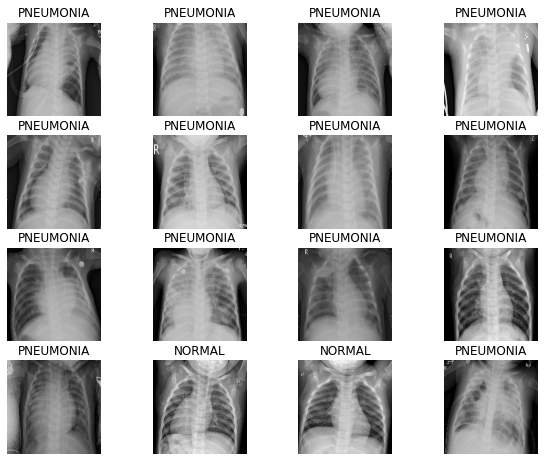

In [15]:
# 이미지 배치를 입력하면, 여러장의 이미지 보여줌
def show_batch(image_batch, label_batch):
    plt.figure(figsize = (10, 10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(5, math.ceil(BATCH_SIZE/5), n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")
        
        
image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

## 7. CNN 모델링

- 가장 대표적인 딥러닝 모델인 CNN을 모델링하고 결과 만들어 보기
- [CNN, Convolutional Neural Network 요약](http://taewan.kim/post/cnn/)
- 먼저, Convolution block 만들기
- conv_block()의 구성은 Convolution을 2번 진행하고 Batch Normalization을 통해서 Gradient vanishing, Gradient Exploding을 해결
- 그리고 Max Pooling을 함

In [16]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation = 'relu', padding = 'same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation = 'relu', padding = 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

- Dense Block은 아래와 같이 만듬

In [17]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

- 만들 CNN 모델은 약간의 수정을 거쳐 만들어진 모델
- 전형적인 CNN 모델과는 약간 다를 모델
- 방금 만들어진 모델에는 Batch Normalization과 Dropout이라는 2가지 regularization 기법에 동시에 사용되고 있음
- 일반적으로 이런 방법은 잘 사용되지 않거나, 금기시되기도 함
- 대표적으로 아래와 같은 논문의 사례를 들 수 있음
- [Understanding the Disharmony between Dropout and Batch Normalization by Variance Shift](https://openaccess.thecvf.com/content_CVPR_2019/papers/Li_Understanding_the_Disharmony_Between_Dropout_and_Batch_Normalization_by_Variance_CVPR_2019_paper.pdf)
    - 위 논문에서는 variance shift를 억제하는 Batch Normalization과 이를 유발하는 Dropout을 동시에 사용하는 것이 어울리지 않다고 밝히고 있음
- 그러나, 실용적으로는 2 방법을 같이 쓰는 것이 낫다고 보는 견해도 없는 것은 아님
- 예외적으로 동시에 사용하는 것이 성능 향상에 도움을 주는 경우가 실제로 있음
- 아래 논문과 같이 두 방법을 같이 쓰는 것을 옹호하는 경우도 있음
- [Rethinking the Usage of Batch Normalization and Dropout in the Training of Deep Neural Netweorks](https://arxiv.org/pdf/1905.05928.pdf)
- 이번 실습에서는 2가지를 함께 사용하는 이 모델이 성능 향상에 도움이 될지 여부도 살펴보면 될 것

In [18]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation = 'relu', padding = 'same'),
        tf.keras.layers.Conv2D(16, 3, activation = 'relu', padding = 'same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    return model

## 8. 데이터 imbalance 처리

- 위에서 이야기한 데이터 imbalance 문제
- 'Normal'과 'Pneumonia' 중에 'Pneumonia' 데이터가 많이 있었음
- 한 라벨이 너무 많은 경우를 imbalance 하다고 하는데, 데이터를 학습할 때 imbalance한 데이터의 경우 학습 효과가 좋지 않을 수 있음
- 이런 문제들을 해결하는 방법으로 'Weight balancing'이라는 테크닉 사용
- Weight balancing은 training set의 각 데이터에서 loss를 계산할 때 특정 클래스의 데이터에 더 큰 loss 값을 갖도록 가중치를 부여하는 방법
- Keras는 model.fit()을 호출할 때 파라미터로 넘기는 class_weight에 이러한 클래스별 가중치를 세팅할 수 있도록 지원하고 있음
- 상세한 내용은 아래 링크를 참고
- [딥러닝에서 클래스 불균형을 다루는 방법](https://3months.tistory.com/414)

- 아래 코드에서 'weight_for_0'은 'Normal' 이미지에 사용할 weight를, 'weight_for_1'은 'Pneumonia' 이미지에 사용할 weight를 세팅
- 이 weight들은 'Normal'과 'Pneumonia' 전체 데이터 건수에 반비례하도록 설정됨

In [19]:
weight_for_0 = (1 / COUNT_NORMAL) * (TRAIN_IMG_COUNT) / 2.0
weight_for_1 = (1 / COUNT_PNEUMONIA) * (TRAIN_IMG_COUNT) / 2.0

class_weight = {0:weight_for_0, 1:weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.88
Weight for PNEUMONIA: 0.68


## 9. 모델 훈련

- 이미지 훈련은 GPU를 사용할 것이기 때문에 먼저 GPU를 선택
- 모델은 위에서 만들었던 모델 함수인 build_model()을 model에 선언
- 이미지의 라벨이 2개밖에 없기 때문에 "binary_cross_entropy" loss를 사용
- optimizer로 'adam'을 사용
- 성과에 대해서 측정하기 위한 metrics로 'accuracy', 'precision', 'recall'을 사용

In [20]:
with tf.device('/GPU:0'):
    model = build_model()
    
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name = 'precision'),
        tf.keras.metrics.Recall(name = 'recall')
    ]
    
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = METRICS
    )

- 모델 fit 해보기
- 각 파라미터에 선언했었던 변수, 데이터 셋을 가져와서 각각에 맞게 넣어줌(모델 학습시 약 20분 이상 소요됨)

In [21]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch = TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs = EPOCHS,
        validation_data = val_ds,
        validation_steps = VAL_IMG_COUNT // BATCH_SIZE,
        class_weight = class_weight,
    )

Epoch 1/25
261/261 [==============================] - 61s 148ms/step - loss: 0.5646 - accuracy: 0.7319 - precision: 0.9169 - recall: 0.7003 - val_loss: 0.6199 - val_accuracy: 0.7760 - val_precision: 0.7760 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 37s 141ms/step - loss: 0.3073 - accuracy: 0.8830 - precision: 0.9635 - recall: 0.8742 - val_loss: 1.0727 - val_accuracy: 0.7750 - val_precision: 0.7750 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 37s 141ms/step - loss: 0.2426 - accuracy: 0.9090 - precision: 0.9613 - recall: 0.9124 - val_loss: 0.0956 - val_accuracy: 0.9635 - val_precision: 0.9683 - val_recall: 0.9851
Epoch 4/25
261/261 [==============================] - 36s 139ms/step - loss: 0.2034 - accuracy: 0.9209 - precision: 0.9732 - recall: 0.9190 - val_loss: 0.2847 - val_accuracy: 0.8952 - val_precision: 0.9971 - val_recall: 0.8671
Epoch 5/25
261/261 [==============================] - 35s 133ms/step - loss: 0.1912 - accura

 ## 10. 결과 확인과 시각화

- 그래프로 Epochs마다 모델의 precision, recall, accuracy, loss가 어떻게 변하는지 보여줌

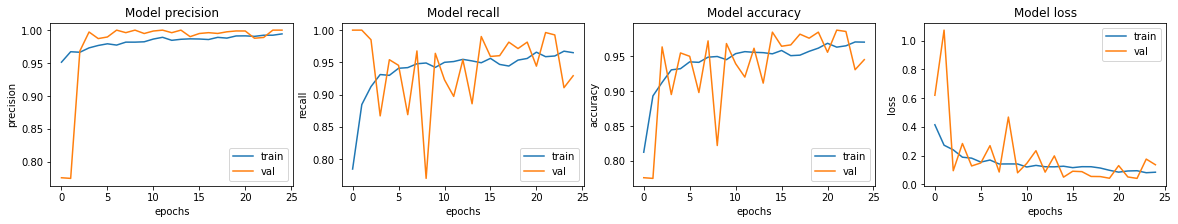

In [22]:
fig, ax = plt.subplots(1, 4, figsize = (20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

- 테스트 데이터로 모델 평가 해보기
- 모델 평가를 위해 loss, accuracy, precision, recall 값을 출력할 예정

In [23]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss}, \nAccuracy: {accuracy}, \nPrecision: {precision}, \nRecall: {recall}')

39/39 [==============================] - 3s 78ms/step - loss: 0.5444 - accuracy: 0.8686 - precision: 0.8548 - recall: 0.9513
Loss: 0.5443567633628845, 
Accuracy: 0.8685897588729858, 
Precision: 0.8548387289047241, 
Recall: 0.9512820243835449


- 폐렴 진단에 있어서 약 80% 정도는 맞출 수 있게 됨
- 의사분들이 90% 이상이시니 거의 비슷한 실력이라기에는 다소 모자라는 느낌은 있지만 의료 보조 용도로는 어느 정도 쓸만한 모델이라고는 할 수 있음
- 성능을 좀 더 개선해볼수 있는 방법은 없을까?
- 이번에 다룬 폐렴 데이터를 기반으로 한 연구도 많이 찾아볼 수 있음
- 의료 데이터의 경우 구하기도 어렵고, 구하더라도 데이터가 작은 경우가 많이 있음
- 이런 문제를 해결하기 위해 Data augmentation 방법을 많이 시도함
- Data augmentation은 각 데이터에 최적화된 방법을 찾기가 어렵고 제약사항이 많음
- 그래서 의료분야에서는 기본적인 Data augmentation 방법들을 많이 사용함
- 이미지 회전, 가우시안 노이즈 추가 방법 등을 많이 사용함
- 특히 장기의 크기는 사람마다 거의 바뀌지 않음
- 이런 특성을 이용한 방법이 노이즈 추가 방법
- 전통적인 Data augmentation 방법 이외에도 GAN을 이용해서 Data augmentation을 시도하는 연구들도 많이 있으니 참고하면 좋을 것 같음